In [0]:
import tensorflow as tf


In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
import os

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
np.random.seed=42

In [0]:
 TRAIN_PATH= '/content/gdrive/My Drive/Con_project (1)/train_model_nucleus/'
 TEST_PATH= '/content/gdrive/My Drive/stage1_test/'

In [0]:
 train_ids = next(os.walk(TRAIN_PATH))[1]
 test_ids = next(os.walk(TEST_PATH))[1]

In [0]:
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=3

In [0]:
import numpy as np
import random
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


In [0]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)


In [13]:
print(X_train.shape)
print(Y_train.shape)


(670, 128, 128, 3)
(670, 128, 128, 1)


In [14]:
#resize for training
for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
  path = TRAIN_PATH + id_
  img = imread(path + '/images/' +id_+ '.png')[:,:,:IMG_CHANNELS]
  img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True)
  X_train[n] = img
  mask = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)
  for mask_file in next(os.walk(path + '/masks/'))[2]:
    mask_= imread(path + '/masks/' + mask_file)
    mask_ = np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True),axis=-1)
    mask = np.maximum(mask,mask_)
  Y_train[n] = mask



100%|██████████| 670/670 [2:57:20<00:00, 21.70s/it]


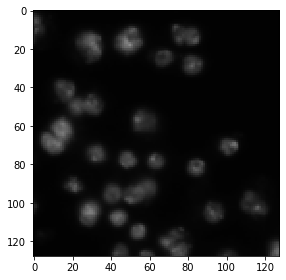

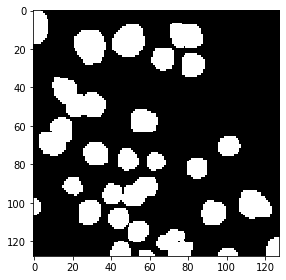

In [15]:
image_x = random.randint(0,len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [35]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
sizes_test = []
for n,id_ in tqdm(enumerate(test_ids),total=len(test_ids)):
  path = TEST_PATH + id_
  img = imread(path + '/images/' +id_+ '.png')[:,:,:IMG_CHANNELS]
  sizes_test.append([img.shape[0], img.shape[1]])
  img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True)
  X_test[n] = img

100%|██████████| 65/65 [00:37<00:00,  1.79it/s]


In [0]:
inputs= tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))

In [0]:
s=tf.keras.layers.Lambda(lambda x:x / 255)(inputs)

In [20]:
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
c1=tf.keras.layers.Dropout(0.1)(c1)

In [0]:
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)

In [0]:
p1= tf.keras.layers.MaxPooling2D((2,2))(c1)

In [0]:
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2= tf.keras.layers.MaxPooling2D((2,2))(c2)

In [0]:
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3=tf.keras.layers.Dropout(0.2)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3= tf.keras.layers.MaxPooling2D((2,2))(c3)

In [0]:
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4=tf.keras.layers.Dropout(0.2)(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4= tf.keras.layers.MaxPooling2D((2,2))(c4)

In [0]:
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5=tf.keras.layers.Dropout(0.3)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)

In [0]:
#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c6) 

In [0]:
u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c7) 

In [0]:
u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c8) 

In [0]:
u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c9) 

In [0]:
outputs = tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

In [33]:
model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     


In [34]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5',verbose=1, save_best_only=True)
callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = model.fit(X_train,Y_train,validation_split=0.1,batch_size=16,epochs=25,callbacks=callbacks)


Train on 603 samples, validate on 67 samples
Epoch 1/25
603/603 [==============================] - 107s 178ms/sample - loss: 0.5643 - acc: 0.7857 - val_loss: 0.4416 - val_acc: 0.8022
Epoch 2/25
603/603 [==============================] - 111s 184ms/sample - loss: 0.3181 - acc: 0.8447 - val_loss: 0.2565 - val_acc: 0.8692
Epoch 3/25
603/603 [==============================] - 120s 199ms/sample - loss: 0.1954 - acc: 0.9202 - val_loss: 0.1774 - val_acc: 0.9316
Epoch 4/25
603/603 [==============================] - 120s 199ms/sample - loss: 0.1467 - acc: 0.9438 - val_loss: 0.1365 - val_acc: 0.9479
Epoch 5/25
603/603 [==============================] - 120s 198ms/sample - loss: 0.1218 - acc: 0.9536 - val_loss: 0.1102 - val_acc: 0.9591
Epoch 6/25
603/603 [==============================] - 118s 196ms/sample - loss: 0.1141 - acc: 0.9566 - val_loss: 0.1424 - val_acc: 0.9503
Epoch 7/25
603/603 [==============================] - 119s 197ms/sample - loss: 0.1090 - acc: 0.9584 - val_loss: 0.1061 - val_a

65/65 [==============================] - 3s 41ms/sample


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


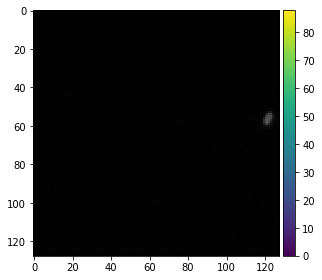

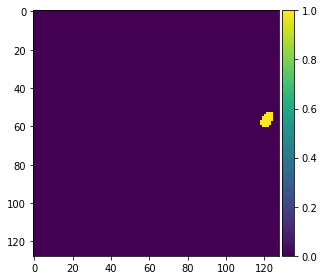

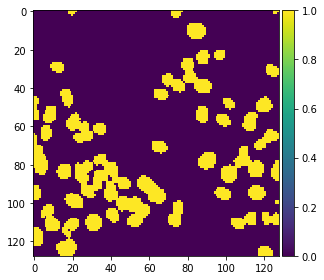

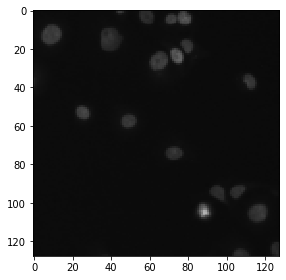

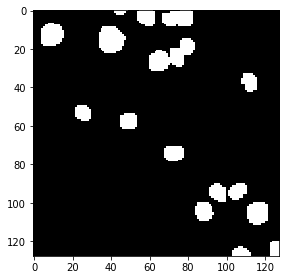

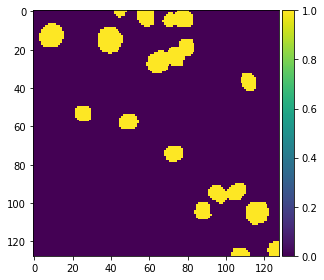

In [38]:
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)
preds_test = model.predict(X_test,verbose=1)

preds_train_t = (preds_train>0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


ix = random.randint(0,len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


ix = random.randint(0,len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()